In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [3]:
# assigning data to variables and also select location at the same time
gauge_data = xr.open_dataset('2.Accra_gauge_redate.nc').precip.sel(lon=-0.19,lat=5.6)
satellite_data_A = xr.open_dataset('Accra_SatA_redate.nc').pre.sel(lon=-0.19,lat=5.6)
satellite_data_B = xr.open_dataset('Accra_SatB_redate.nc').precip.sel(lon=-0.19,lat=5.6)

In [4]:
gauge_data

<xarray.DataArray 'precip' (time: 252)>
[252 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1990-01-16 1990-02-16 ... 2010-12-16
    lon      float64 -0.19
    lat      float64 5.6
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/day
    cell_methods:        time: sum
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [9]:
# Assigning data to variables and also selecting location at the same time
gauge_data = xr.open_dataset('2.Accra_gauge_redate.nc').precip.sel(lon=-0.19, lat=5.6)
satellite_data_A = xr.open_dataset('Accra_SatA_redate.nc').pre.sel(lon=-0.19, lat=5.6)
satellite_data_B = xr.open_dataset('Accra_SatB_redate.nc').precip.sel(lon=-0.19, lat=5.6)

# Data quality control: Checking if data is not empty
if gauge_data.size == 0 or satellite_data_A.size == 0 or satellite_data_B.size == 0:
    raise ValueError("One or more datasets are empty. Please check the data files.")

# Calculate RMSE for SatA
rmse_A = np.sqrt(((gauge_data - satellite_data_A)**2).mean()).values.flatten()

# Calculate RMSE for SatB
rmse_B = np.sqrt(((gauge_data - satellite_data_B)**2).mean()).values.flatten()

# Print RMSE values
print("Root Mean Square Error for Satellite A:", rmse_A)
print("Root Mean Square Error for Satellite B:", rmse_B)

# Calculate Pearson correlation coefficient for SatA
corr_A, _ = pearsonr(gauge_data.values.flatten(), satellite_data_A.values.flatten())

# Calculate Pearson correlation coefficient for SatB
corr_B, _ = pearsonr(gauge_data.values.flatten(), satellite_data_B.values.flatten())

# Print correlation coefficients
print("Correlation coefficient for SatA:", corr_A)
print("Correlation coefficient for SatB:", corr_B)


# Calculate Relative Error for SatA with masking
relative_error_A = (np.abs(gauge_data - satellite_data_A) / (np.abs(gauge_data)) ).mean().values.flatten()

# Calculate Relative Error for SatB with masking
relative_error_B = (np.abs(gauge_data - satellite_data_B) / (np.abs(gauge_data) )).mean().values.flatten()

# Print Relative Error values
print("Relative Error for Satellite A:", relative_error_A)
print("Relative Error for Satellite B:", relative_error_B)


Root Mean Square Error for Satellite A: [34.287155]
Root Mean Square Error for Satellite B: [31.925694]
Correlation coefficient for SatA: 0.9014303094376165
Correlation coefficient for SatB: 0.9260119218928223
Relative Error for Satellite A: [inf]
Relative Error for Satellite B: [inf]


In [10]:
#CALCULATING FOR ROOT MEAN SQUARE ERROR

# data quality contro : Checking if data is not empty
if gauge_data.size == 0 or satellite_data_A.size == 0 or satellite_data_B.size == 0:
    raise ValueError("One or more datasets are empty. Please check the data files.")

# Calculate RMSE for SatA
rmse_A = np.sqrt(((gauge_data - satellite_data_A)** 2).mean()).values.flatten()

# Calculate RMSE for SatB
rmse_B = np.sqrt(((gauge_data - satellite_data_B)** 2).mean()).values.flatten()

# Print RMSE values
print("Root Mean Square Error for Satellite A:", rmse_A)
print("Root Mean Square Error for Satellite B:", rmse_B)

# Calculate Pearson correlation coefficient for SatA
corr_A, _ = pearsonr(gauge_data.values.flatten(), satellite_data_A.values.flatten())

# Calculate Pearson correlation coefficient for SatB
corr_B, _ = pearsonr(gauge_data.values.flatten(), satellite_data_B.values.flatten())

# Print correlation coefficients
print("Correlation coefficient for SatA:", [corr_A])
print("Correlation coefficient for SatB:", [corr_B])



Root Mean Square Error for Satellite A: [34.287155]
Root Mean Square Error for Satellite B: [31.925694]
Correlation coefficient for SatA: [0.9014303094376165]
Correlation coefficient for SatB: [0.9260119218928223]


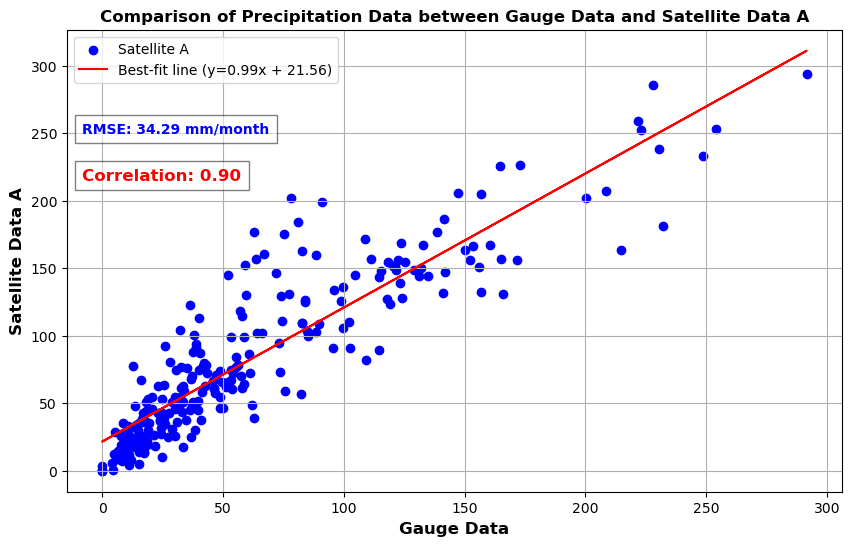

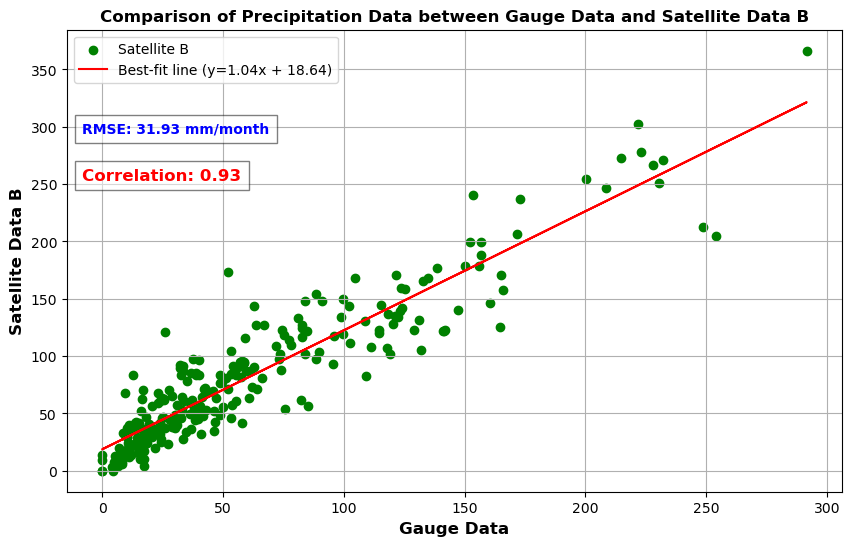

In [11]:

# Function to annotate plot with RMSE and correlation values
def annotate_plot(ax, rmse, corr, rmse_color='black', corr_color='black', x=0.02, y=0.8, bbox_color='white'):

        # Convert rmse and corr to scalars
    rmse = rmse.item()
    corr = corr.item()
    
    rmse_text = f"RMSE: {rmse:.2f} mm/month"
    corr_text = f"Correlation: {corr:.2f}"
    ax.text(x, y, rmse_text , transform=ax.transAxes, fontsize=10, fontweight='bold', 
            verticalalignment='top', bbox=dict(facecolor=bbox_color, alpha=0.5, pad=5), color='blue')
    ax.text(x, y - 0.1, corr_text, transform=ax.transAxes, fontsize=12, fontweight='bold', 
            verticalalignment='top', bbox=dict(facecolor=bbox_color, alpha=0.5, pad=5), color='red')


# Plot scatter plot for SatA
plt.figure(figsize=(10, 6))
plt.scatter(gauge_data, satellite_data_A, color='blue', label='Satellite A')
plt.xlabel('Gauge Data', fontweight='bold',fontsize=12)
plt.ylabel('Satellite Data A', fontweight='bold',fontsize=12)
plt.title('Comparison of Precipitation Data between Gauge Data and Satellite Data A', fontweight='bold',fontsize=12)
plt.grid(True)

# Plot best-fit line
m, b = np.polyfit(gauge_data.values.flatten(), satellite_data_A.values.flatten(), 1)
plt.plot(gauge_data, m*gauge_data + b, color='red', label=f'Best-fit line (y={m:.2f}x + {b:.2f})')

# Annotate plot with RMSE and correlation values
annotate_plot(plt.gca(), rmse_A, corr_A, rmse_color='green', corr_color='blue')

plt.legend()
plt.show()

# Plot scatter plot for SatB
plt.figure(figsize=(10, 6))
plt.scatter(gauge_data, satellite_data_B, color='green', label='Satellite B')
plt.xlabel('Gauge Data', fontweight='bold',fontsize=12)
plt.ylabel('Satellite Data B', fontweight='bold',fontsize=12)
plt.title('Comparison of Precipitation Data between Gauge Data and Satellite Data B', fontweight='bold',fontsize=12)
plt.grid(True)

# Plot best-fit line
m, b = np.polyfit(gauge_data.values.flatten(), satellite_data_B.values.flatten(), 1)
plt.plot(gauge_data, m*gauge_data + b, color='red', label=f'Best-fit line (y={m:.2f}x + {b:.2f})')

# Annotate plot with RMSE and correlation values at custom position
annotate_plot(plt.gca(), rmse_B, corr_B, rmse_color='orange', corr_color='purple')

plt.legend()
plt.show()
